In [57]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
import ml_experiment as ml
reload(ml)

<module 'ml_experiment' from 'ml_experiment.pyc'>

In [59]:
data = pd.read_csv('./ATLAS_LC/signatures_8_encoded.csv', index_col=0)

In [109]:
objid = data['OBJID']
filt = data['filter']
y = data['CLASS']
x = data[['encode_{}'.format(i+1) for i in range(8)]]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

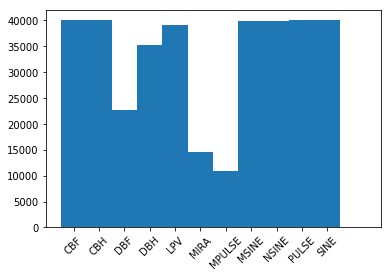

In [110]:
plt.figure(figsize=(6, 4))
plt.hist(y, bins=np.arange(13)-0.5)
plt.xticks(rotation=45)

In [111]:
y = y.as_matrix()

/home/bruno/.virtualenvs/iPTF/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.90, random_state=17)

In [113]:
len(X_train)

36253

This first split is to develop - final testing

After this a k-fold CV inside develop sample is going to bring us to destination

## Feature selection on encoded vector

In [114]:
sel = feature_selection.VarianceThreshold(threshold=(.9 * (1 - .9)))
X_sel = sel.fit_transform(X_train)

In [115]:
X_sel.shape

(36253, 8)

In [116]:
sel = feature_selection.GenericUnivariateSelect(score_func=feature_selection.mutual_info_classif, param=55)
X_new = sel.fit_transform(X_sel, y_train)
X_new.shape

(36253, 4)

In [117]:
result = ml.experiment(clf=RandomForestClassifier(max_features=3, n_estimators=600, n_jobs=4), 
              x=X_new, y=y_train, nfolds=4, printing=True, multiclass=True)

             precision    recall  f1-score   support

        CBF       0.26      0.27      0.26      3949
        CBH       0.26      0.26      0.26      3931
        DBF       0.22      0.16      0.19      2336
        DBH       0.39      0.47      0.43      3541
        LPV       0.23      0.19      0.21      3908
       MIRA       0.42      0.35      0.38      1486
     MPULSE       0.08      0.02      0.03      1100
      MSINE       0.22      0.24      0.23      4069
      NSINE       0.27      0.32      0.29      3965
      PULSE       0.57      0.63      0.60      3965
       SINE       0.19      0.18      0.19      4003

avg / total       0.29      0.30      0.29     36253



In [135]:
reload(ml)

<module 'ml_experiment' from 'ml_experiment.py'>

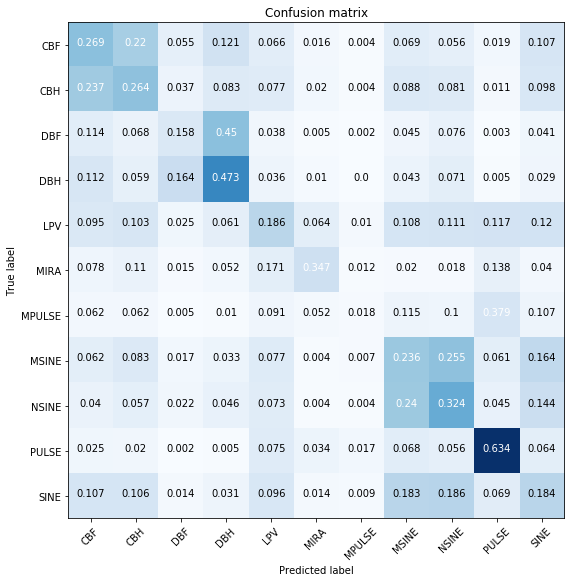

In [140]:
classes = ['CBF', 'CBH', 'DBF', 'DBH', 'LPV', 'MIRA', 'MPULSE', 'MSINE', 'NSINE', 'PULSE', 'SINE']
plt.figure(figsize=(8,8))
ml.plot_confusion_matrix(result['confusion_matrix'], classes=classes, thresh=0.2, normalize=True)

## Try multilabel with dummies from pandas

In [74]:
data_dumm = pd.get_dummies(data)

In [80]:
objid = data['OBJID']
filt = data['filter']
y = data_dumm[[lab for lab in data_dumm.columns if 'CLASS' in lab]]
x = data_dumm[['encode_{}'.format(i+1) for i in range(8)]]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.90, random_state=17)

In [95]:
for acol in y_train.columns:
    y_s = y_train[acol]
    print 'Classification scores for {}'.format(acol)
    result = ml.experiment(clf=RandomForestClassifier(max_features=3, n_estimators=600, n_jobs=4), 
              x=X_train.values, y=y_s.values, nfolds=4, printing=True, multiclass=False)
    print(result['confusion_matrix'])

Classification scores for CLASS_CBF


/home/bruno/.virtualenvs/iPTF/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


             precision    recall  f1-score   support

        0.0       0.90      0.99      0.94     32304
        1.0       0.56      0.13      0.21      3949

avg / total       0.87      0.89      0.86     36253

[[31896   408]
 [ 3428   521]]
Classification scores for CLASS_CBH
             precision    recall  f1-score   support

        0.0       0.90      0.99      0.94     32322
        1.0       0.51      0.08      0.13      3931

avg / total       0.86      0.89      0.85     36253

[[32036   286]
 [ 3634   297]]
Classification scores for CLASS_DBF
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.97     33917
        1.0       0.43      0.06      0.10      2336

avg / total       0.91      0.93      0.91     36253

[[33740   177]
 [ 2202   134]]
Classification scores for CLASS_DBH
             precision    recall  f1-score   support

        0.0       0.94      0.97      0.96     32712
        1.0       0.63      0.44      0.52     